In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [35]:
#Loading the dataset
c_spend = pd.read_csv("customer_spending_dataset.csv")
c_spend.head()

,Customer_ID,Customer_Age,Monthly_Income_USD,Past_Purchases_Count,Loyalty_Membership_Duration_Months,Spending_Habit_Score
0,1001,56,24000,3,59,31
1,1002,46,90588,18,8,22
2,1003,32,113610,19,20,37
3,1004,60,117856,0,29,59
4,1005,25,58304,19,54,40


In [36]:
#Checking shape
c_spend.shape

(500, 6)

**<font size="5">The dataset has 500 rows and 6 columns</font>**

**<font size="10">Exploratory Data Analysis</font>**

In [37]:
#Checking info
c_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Customer_ID                         500 non-null    int64
 1   Customer_Age                        500 non-null    int64
 2   Monthly_Income_USD                  500 non-null    int64
 3   Past_Purchases_Count                500 non-null    int64
 4   Loyalty_Membership_Duration_Months  500 non-null    int64
 5   Spending_Habit_Score                500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [38]:
#Checking for null values
pd.DataFrame({'Count': c_spend.isnull().sum(), 'Percentage': c_spend.isnull().sum()/len(c_spend)}) 

,Count,Percentage
Customer_ID,0,0.0
Customer_Age,0,0.0
Monthly_Income_USD,0,0.0
Past_Purchases_Count,0,0.0
Loyalty_Membership_Duration_Months,0,0.0
Spending_Habit_Score,0,0.0


**<font size="5">The null counts of dataset is 0</font>**

In [39]:
#Checking for duplicates
pd.DataFrame([{'Count': c_spend.duplicated().sum(), 'Percentage': c_spend.duplicated().sum()/len(c_spend)}])

,Count,Percentage
0,0,0.0


**<font size="5">The dataset has no duplicate values</font>**

In [40]:
#Statistical summary
c_spend.describe()

,Customer_ID,Customer_Age,Monthly_Income_USD,Past_Purchases_Count,Loyalty_Membership_Duration_Months,Spending_Habit_Score
count,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000
mean,1250.500000,41.278000,67210.16800,9.270000,30.13800,58.256000
std,144.481833,13.389072,28908.77426,5.815905,16.82299,23.698052
min,1001.000000,18.000000,20055.00000,0.000000,1.00000,20.000000
25%,1125.750000,30.000000,42534.25000,4.000000,15.00000,38.000000
50%,1250.500000,42.000000,64906.50000,9.000000,30.00000,56.000000
75%,1375.250000,52.000000,93071.25000,14.000000,45.00000,79.250000
max,1500.000000,64.000000,119835.00000,19.000000,59.00000,99.000000


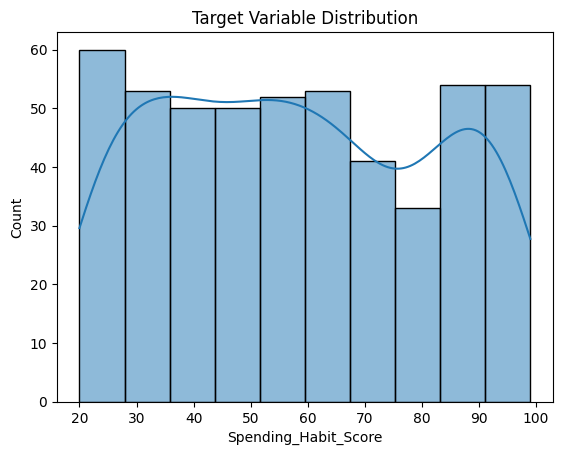

In [41]:
#Checking for ditribution & KDE
sns.histplot(c_spend['Spending_Habit_Score'], kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [42]:
#Checking skewness & kurtosis
print("Skewness:", c_spend['Spending_Habit_Score'].skew())
print("Kurtosis:", c_spend['Spending_Habit_Score'].kurt()) 

Skewness: 0.1026965259544739
Kurtosis: -1.2149524469158002


**<font size="5">The skewness is close to 0 so the data is symmetric & not skewed</font>**

**<font size="5">The kurtosis<3 which indicates platykurtic distribution. It means target variable has flat distribution light tails and fewer extreme values.</font>**

In [43]:
#Checking for variance & SD
print("Variance:", c_spend['Spending_Habit_Score'].var())
print("Standard Deviation:", c_spend['Spending_Habit_Score'].std())

Variance: 561.5976593186373
Standard Deviation: 23.6980518042863


**<font size="5">The variance of 561 indicates that values are somewhat spread</font>**

**<font size="5">The SD of 23 indicates moderate spread around the mean</font>**

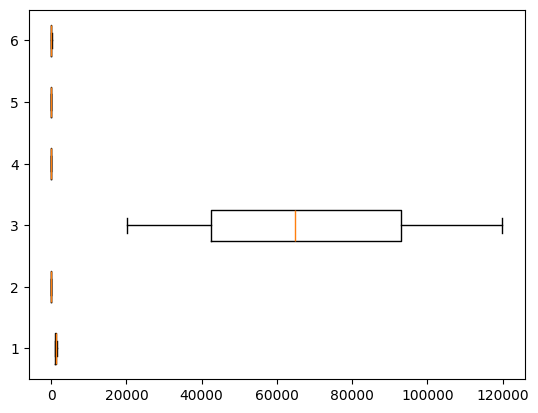

In [44]:
#Checking for outliers by plotting boxplot
plt.boxplot(c_spend, vert=False)
plt.show()

**<font size="5">There are few outliers in the dataset</font>**

In [52]:
#Splitting the dataset
X=pd.DataFrame(c_spend.drop(["Spending_Habit_Score"], axis=1))
y=pd.DataFrame(c_spend["Spending_Habit_Score"])

In [46]:
#Checking features shape
X.shape

(500, 5)

**<font size="5">Our feature variable has 500 rows and 5 columns</font>**

In [47]:
#Checking target shape
y.shape

(500, 1)

**<font size="5">Our target variable has 500 rows and 1 column</font>**

In [48]:
#Scaling outliers using StandardScaler
standard_scaler=preprocessing.StandardScaler()
X=standard_scaler.fit_transform(X)

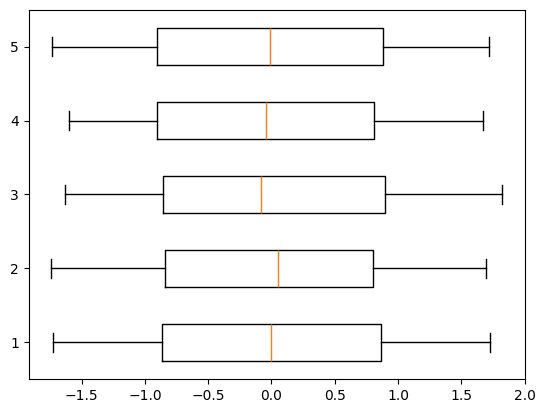

In [49]:
#Checking for scaled features
plt.boxplot(X, vert=False)
plt.show()

**<font size="5">Now are outliers are scaled</font>**

**<font size="10">Feature Selection</font>**

**<font size="5">Dropping unwanted columns</font>**

In [53]:
#Dropping customer id 
X=pd.DataFrame(X.drop(["Customer_ID"], axis=1))
X.head()

,Customer_Age,Monthly_Income_USD,Past_Purchases_Count,Loyalty_Membership_Duration_Months
0,56,24000,3,59
1,46,90588,18,8
2,32,113610,19,20
3,60,117856,0,29
4,25,58304,19,54


**<font size="5">Low Variance Filter</font>**

In [54]:
#Normalizing the varibale X
X_v=X/X.mean()
X_v.var()

Customer_Age                          0.105212
Monthly_Income_USD                    0.185008
Past_Purchases_Count                  0.393618
Loyalty_Membership_Duration_Months    0.311586
dtype: float64

In [55]:
#Checking low variance column
X_v.var()>0.03

Customer_Age                          True
Monthly_Income_USD                    True
Past_Purchases_Count                  True
Loyalty_Membership_Duration_Months    True
dtype: bool

**<font size="5">There is no column which has low variance</font>**

**<font size="5">High Correlation Filter</font>**

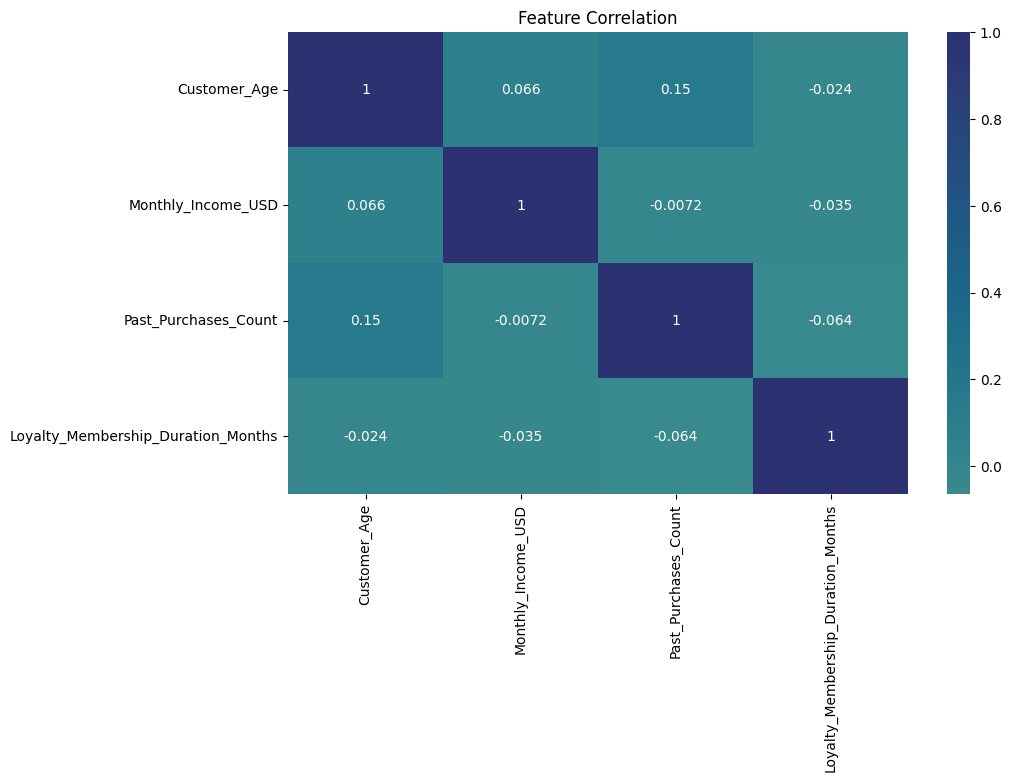

In [56]:
#Setting the fig size
plt.subplots(figsize=(10,6))

#Plotting heatmap
heat_map = sns.heatmap(X.corr(), center=0, cmap='crest', annot=True)
heat_map.set_title('Feature Correlation')

#Printing heatmap
plt.show()

In [57]:
#High Correlation filter
X_corr=X.corr()>0.95
X_corr

,Customer_Age,Monthly_Income_USD,Past_Purchases_Count,Loyalty_Membership_Duration_Months
Customer_Age,True,False,False,False
Monthly_Income_USD,False,True,False,False
Past_Purchases_Count,False,False,True,False
Loyalty_Membership_Duration_Months,False,False,False,True


**<font size="5">Our features are not highly correlated</font>**

In [58]:
#Splitting the dataset into train & test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [59]:
#Checking shape for train & test split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 4) (100, 4) (400, 1) (100, 1)


**<font size="5">Random Forest Filter</font>**

In [60]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

#Converting array to series
rf_feat=pd.DataFrame(rf.feature_importances_, index=X_train.columns)
rf_feat

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,0
Customer_Age,0.242753
Monthly_Income_USD,0.306037
Past_Purchases_Count,0.200488
Loyalty_Membership_Duration_Months,0.250722


**<font size="4">There is no column which has less value than 0.01</font>**

**<font size="10">Model Selection</font>**

**<font size="8">Linear Regression</font>**

In [74]:
#Initiating the model
model_linreg=LinearRegression()

In [90]:
#Cross-Validating the model
mse_scores=cross_val_score(model_linreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

#Converting negative MSE to RMSE
rmse_scores=np.sqrt(-mse_scores)

#Printing RMSE
print("Cross-Validation RMSE scores:", rmse_scores)
print("The mean accuracy of cross-validation is:", rmse_scores.mean())

Cross-Validation RMSE scores: [22.84875848 24.37401339 23.19910458 23.95161949 24.44998259]
The mean accuracy of cross-validation is: 23.76469570652215


In [76]:
#Performing fit
model_linreg.fit(X_train, y_train)

LinearRegression()

In [79]:
#Generating prediction
y_pred=model_linreg.predict(X_test)
print(y_pred.reshape(-1))

[56.31520022 55.31686677 57.97639726 57.56458369 58.64640392 55.9623264
 59.31422496 60.0756836  57.16848844 59.83639696 57.54766984 58.87851998
 58.82082986 58.90774131 55.90348365 55.05077517 60.64652273 61.69933021
 53.48217348 56.56385109 58.24563501 59.1256795  59.71439334 58.89031991
 55.2740282  57.90645978 60.74170993 60.12717147 58.13875113 55.53001855
 50.65968899 56.96438322 56.23256956 59.09922826 55.78991912 57.88707225
 56.79637903 55.20071642 56.99055837 57.50857277 59.96046131 61.48665038
 58.84324239 56.68598706 57.20492359 57.98428612 56.1904862  56.34884206
 57.10687465 58.04750462 55.9909035  54.90917212 57.38796358 59.51088083
 56.06686103 53.58814758 57.96028546 54.96286544 56.56026581 54.94000502
 60.6677862  58.69091915 57.69819929 58.55469569 57.83705425 61.01217297
 55.58368874 58.50009911 58.8342956  58.24962877 56.2043996  57.34841614
 58.39627966 62.35423669 57.99710975 58.25699259 57.7449774  56.75361985
 57.17318626 55.09160836 55.56062525 60.59253607 55.

In [80]:
#Final Evaluation on testing data
print("The RMSE value of the MLR model on the test dataset is:")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE value of the MLR model on the test dataset is:
24.39523747193889


In [81]:
#Checking for overfitting
y_train_pred=model_linreg.predict(X_train)
print(y_train_pred.reshape(-1))

[54.48384301 54.59153587 55.01043916 57.0192569  59.10652095 60.9474661
 59.87119888 56.59569043 58.90411375 58.40950218 62.09375349 53.35397571
 59.42442892 59.08611135 55.42109794 57.30120156 56.99589286 60.45059311
 55.85561302 55.38233776 58.5992485  57.25017029 55.73714134 58.85529203
 57.15837139 53.50145116 61.86054097 58.25843513 57.33996099 54.08613358
 55.12451674 54.28421033 53.73042625 55.7031561  58.73958066 57.9557021
 58.15677803 58.63449899 61.2158955  54.89431984 57.76230977 59.76229155
 58.21112823 54.13379751 60.14107504 59.24815446 54.59197213 60.48375671
 61.66019603 58.2664433  60.84741844 57.54400018 55.8716502  58.786146
 56.97422495 54.14577694 58.626231   55.98064498 58.388896   57.25903681
 56.36239764 58.38446334 60.95110369 61.65151747 56.71248225 52.46655759
 59.36332962 57.71172358 59.40663823 57.82609703 62.27807573 58.56849138
 52.47181847 54.41055654 58.41357104 57.98334655 55.73455295 56.79422548
 56.95787123 57.60515488 57.33010113 56.45459926 60.067

In [83]:
#Final evaluation on training data
print("The RMSE value of the MLR model on the train dataset is:")
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

The RMSE value of the MLR model on the train dataset is:
23.373515542529343


**<font size="5">There is not much difference b/w Train RMSE and Test RMSE, so our model is not a over-fitting model</font>**

In [89]:
#Accuracy score
score=cross_val_score(model_linreg, X_train, y_train, cv=5, scoring='r2')

#Printing R2 score
print("Cross-Validation R2 scores:", score)
print("The mean accuracy of cross-validaton is:", score.mean())

Cross-Validation R2 scores: [-0.00397383  0.01255073 -0.06245746 -0.05989864 -0.07073547]
The mean accuracy of cross-validaton is: -0.03690293481541675


In [93]:
#Final Evaluation on testing data
print("The R2 score of MLR model on the testing data is:")
print(model_linreg.score(X_test, y_test))

The R2 score of MLR model on the testing data is:
-0.015220801238835069


**<font size="5">An R2 score of -0.015 indicates that the model is performing worse & is a poor fit model</font>**

In [94]:
#Final Evaluation on testing data
print("The R2 score of MLR model on training datat is:")
print(model_linreg.score(X_train, y_train))

The R2 score of MLR model on training datat is:
0.00994208394519791


**<font size="5">A train R2 score of 0.009 indicates that our model is underfitting & it is barely learning any patterns</font>**

In [160]:
#Feature importances 
fea_imp=np.abs(model_linreg.coef_).reshape(-1)

#Converting to dataframe
fea_imp_df=pd.DataFrame({'Feature': X_train.columns, 'Importance': fea_imp})

#Sorting by desc
fea_imp_df=fea_imp_df.sort_values(by='Importance', ascending=False)

print(fea_imp_df)

                              Feature  Importance
2                Past_Purchases_Count    0.272515
0                        Customer_Age    0.088075
3  Loyalty_Membership_Duration_Months    0.075074
1                  Monthly_Income_USD    0.000010


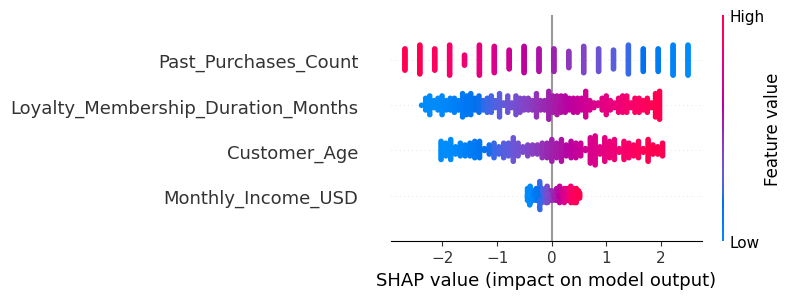

In [165]:
#Visualizing feature imp
explainer=shap.Explainer(model_linreg, X_train)
shap_values=explainer(X_train)

#Summary plot
shap.summary_plot(shap_values, X_train)

**<font size="8">Random Forest Regressor</font>**

In [97]:
#Initiating the model
rf_model=RandomForestRegressor(random_state=0)

**<font size="6">Hyperparameter Tuning</font>**

In [116]:
#Define parameter grid
param_grid={
    'n_estimators': [50,100,200],
    'max_depth': [1,3,5],
    'min_samples_split': [2,5,10]
}

#Setting up grid search cv
grid_search=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

#Printing the best parameters
print(f"The best parameters are: {grid_search.best_params_}")

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataCon

The best parameters are: {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [134]:
#Cross-Validation using rmse
rmse_scorer=make_scorer(mean_squared_error, greater_is_better=False, squared=False)

#Using best parameters
best_rf_model=grid_search.best_estimator_

#Performing validation
cv_rmse_scores=cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring=rmse_scorer)

#Printing result
print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("The mean RMSE of cross-validation is:", cv_rmse_scores.mean())

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492

Cross-Validation RMSE scores: [-23.02875046 -24.53732388 -23.15216302 -23.84480354 -23.99142462]
The mean RMSE of cross-validation is: -23.710893104229665


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [135]:
#Cross-Validation using r2 score

#Using best parameters
best_rf_model=grid_search.best_estimator_

#Perform cross-validation
cv_r2_score=cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

#Printing result
print("Cross-Validation R2 score is:", cv_r2_score)
print("The mean R2 score of cross-validation is:", cv_r2_score.mean())

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataCon

Cross-Validation R2 score is: [-0.01985382 -0.00072579 -0.05816222 -0.05046616 -0.03094893]
The mean R2 score of cross-validation is: -0.03203138413244746


In [167]:
#Final evaluation
#using best parameters
best_rf_model=grid_search.best_estimator_

#Performing fit
best_rf_model.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=1, n_estimators=200, random_state=0)

In [154]:
#Generating pred on test data
y_tpred=best_rf_model.predict(X_test)
y_tpred

array([57.92659767, 57.18969275, 57.61873152, 58.51097512, 58.10490076,
       56.83575866, 58.83170952, 57.99285436, 57.81885452, 58.41884393,
       58.43426385, 57.85186379, 58.55178464, 55.67322733, 57.69141013,
       57.2527208 , 59.00358958, 58.63276755, 56.78266084, 58.06340319,
       58.38792625, 58.55437084, 55.66679517, 58.33069422, 57.95769805,
       56.82793513, 58.82794475, 58.86432071, 58.27115493, 56.94648808,
       55.40660422, 58.24844031, 57.79155013, 57.36577668, 56.54859083,
       58.18481708, 57.80330714, 57.28018887, 57.96566052, 58.31375602,
       58.78800599, 59.00358958, 58.65378907, 57.46010765, 57.80475618,
       58.39857815, 57.75909108, 57.6293288 , 58.32257609, 58.19248695,
       57.53435145, 57.53678321, 57.33058487, 58.96921222, 57.78252754,
       57.04027756, 58.33374823, 57.53276502, 56.21961668, 57.05083313,
       58.82501228, 58.61492191, 57.21252844, 58.24238157, 57.64008391,
       58.89741538, 56.19122805, 58.82888763, 58.6709513 , 58.50

In [138]:
#Generating r2 score and rmse value
r2_test=r2_score(y_test, y_tpred)
rmse_test=np.sqrt(mean_squared_error(y_test, y_tpred))

#Print final result
print("The tuned RandomForest R2 score is:", r2_test)
print("The tuned RandomForest RMSE value is:", rmse_test)

The tuned RandomForest R2 score is: -0.021867625615767272
The tuned RandomForest RMSE value is: 24.474967081915622


**<font size="5">The R2 score of -0.02 indicates the model is not performing well. It is unable to read the patterns</font>**

**<font size="5">The RMSE value of 24 indicates high prediction error. The model prediction is far from actual values</font>**

In [153]:
#Generating pred on train data
y_tr_pred=best_rf_model.predict(X_train)
y_tr_pred

array([55.4056408 , 56.60167015, 57.03291997, 57.94857647, 58.02617967,
       59.00358958, 59.14599858, 54.46369958, 58.11809117, 58.12813933,
       59.24906637, 56.29748032, 59.01368123, 58.78731917, 56.8906151 ,
       57.60593222, 55.07641424, 58.87359718, 57.96749143, 57.25553623,
       58.54762939, 58.21089603, 57.81206766, 58.87956974, 58.42468149,
       56.45075541, 58.45322129, 58.67301846, 58.33318375, 57.3879689 ,
       57.17300402, 56.55348112, 56.15139786, 57.70147878, 58.64673994,
       58.33236858, 57.84790644, 58.44947932, 59.49693312, 57.03219463,
       58.20513057, 59.11552484, 58.33753025, 55.62928894, 58.87441235,
       59.23004864, 56.81571679, 58.61594708, 59.13887892, 58.38792625,
       58.64260831, 58.07500574, 57.58433502, 58.72852296, 57.25632311,
       53.70062547, 58.35690921, 57.03547924, 58.26081914, 57.06849847,
       56.90005893, 58.18368282, 58.84337156, 59.25970002, 57.83967435,
       55.70413514, 59.23004864, 57.71722719, 58.71399149, 57.95

In [155]:
#Generating r2 score and rmse value on train data
r2_train=r2_score(y_train, y_tr_pred)
rmse_train=np.sqrt(mean_squared_error(y_train, y_tr_pred))

#Print final result
print("The tuned RandomForest R2 score is:", r2_train)
print("The tuned RandomForest RMSE value is:", rmse_train)

The tuned RandomForest R2 score is: 0.022645195537525975
The tuned RandomForest RMSE value is: 23.22308245155536


**<font size="5">The diff. in train and test R2 score shows that model is not predicting well. The model is not overfitting as there is not much diff. in test and train RMSE</font>**

In [169]:
#Feature importances 
fea_imp1=best_rf_model.feature_importances_

#Converting to dataframe
fea_imp1_df=pd.DataFrame({'Feature': X_train.columns, 'Importance': fea_imp1})

#Sorting by desc
fea_imp1_df=fea_imp1_df.sort_values(by='Importance', ascending=False)

print(fea_imp1_df)

                              Feature  Importance
1                  Monthly_Income_USD       0.440
0                        Customer_Age       0.195
3  Loyalty_Membership_Duration_Months       0.190
2                Past_Purchases_Count       0.175


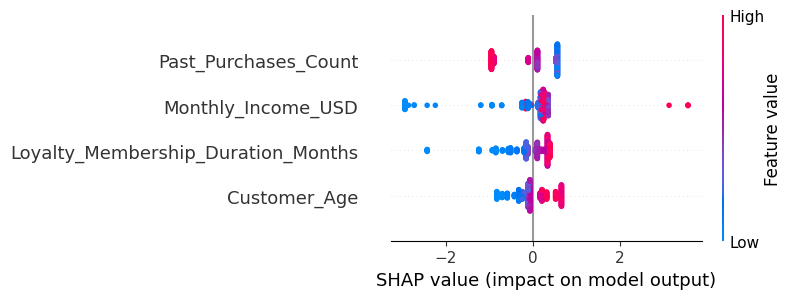

In [170]:
#Visualizing feature imp
explainer=shap.Explainer(best_rf_model, X_train)
shap_values=explainer(X_train)

#Summary plot
shap.summary_plot(shap_values, X_train)

**<font size="8">XGBoost Regressor</font>**

In [130]:
#Initiating the model
xgb_model=XGBRegressor(random_state=1)

**<font size="6">Hyperparameter Tuning</font>**

In [132]:
#Define parameter grid
param_grid1={
    'n_estimators': [100,200,300],
    'learning_rate': [0.05,0.1,0.2],
    'max_depth': [3,5,7]
}

#Setting up grid search cv
grid_search1=GridSearchCV(estimator=xgb_model, param_grid=param_grid1, cv=5, scoring='r2')
grid_search1.fit(X_train, y_train)

#Printing the best parameters
print(f"The best parameters are: {grid_search1.best_params_}")

The best parameters are: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [140]:
#Performing cross-validation using rmse
rmse_scorer1=make_scorer(mean_squared_error, squared=False)

#Using best parameter
best_xgb_model=grid_search1.best_estimator_

#Performing validation
cv_rmse_scores1=cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring=rmse_scorer1)

#Printing result
print("Cross-validation RMSE scores:", cv_rmse_scores1)
print("The mean RMSE of cross-validation is:", cv_rmse_scores1.mean())

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWa

Cross-validation RMSE scores: [23.27141524 26.48711505 25.1598881  25.6832272  25.89195551]
The mean RMSE of cross-validation is: 25.29872022147691


C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [141]:
#Cross-Validation using r2 score

#Using best parameters
best_xgb_model=grid_search1.best_estimator_

#Perform cross-validation
cv_r2_score1=cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')

#Printing result
print("Cross-Validation R2 score is:", cv_r2_score1)
print("The mean R2 score of cross-validation is:", cv_r2_score1.mean())

Cross-Validation R2 score is: [-0.04146039 -0.16608453 -0.24964476 -0.21869135 -0.20075607]
The mean R2 score of cross-validation is: -0.17532742023468018


In [142]:
#Final evaluation
#Using best parameters
best_xgb_model=grid_search1.best_estimator_

#Performing fit
best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [146]:
#Generating pred on test data
y_te_pred=best_xgb_model.predict(X_test)
y_te_pred

array([57.468616, 56.233093, 60.64261 , 59.935017, 62.777943, 54.674915,
       58.986603, 53.815308, 70.08067 , 47.881195, 59.116352, 60.64261 ,
       59.29892 , 57.514526, 59.926365, 64.303604, 59.806442, 64.208855,
       55.885677, 60.0268  , 59.107864, 59.3678  , 52.44355 , 58.37845 ,
       52.065075, 50.902744, 61.77092 , 55.99689 , 54.088852, 52.683697,
       48.92177 , 59.989113, 66.5068  , 58.80185 , 33.512863, 57.900745,
       56.810192, 53.304035, 61.34835 , 60.013958, 64.65808 , 56.294323,
       65.660866, 53.470734, 76.94361 , 56.393642, 64.776794, 72.364845,
       59.234303, 57.967686, 49.29728 , 54.48171 , 50.9022  , 65.077126,
       59.253735, 50.02947 , 57.84219 , 53.20988 , 62.516403, 55.24764 ,
       64.601456, 63.601006, 56.300915, 57.771748, 58.37358 , 68.73465 ,
       58.748585, 69.57243 , 64.85334 , 60.137066, 47.320652, 63.96443 ,
       69.780716, 58.936108, 59.67944 , 53.306435, 59.90576 , 57.974415,
       61.84681 , 48.621605, 66.401085, 69.23254 , 

In [148]:
#Evaluating r2 score and rmse value on test data
r2_test=r2_score(y_test, y_te_pred)
rmse_test=np.sqrt(mean_squared_error(y_test, y_te_pred))

#Print final result
print("The tuned XGB R2 score on test data is:", r2_test)
print("The tuned XGB RMSE value on test data is:", rmse_test)

The tuned XGB R2 score on test data is: -0.07374382019042969
The tuned XGB RMSE value on test data is: 25.088524560077524


**<font size="5">The R2 score of -0.07 indicates that model perfors poorly on test data</font>**

**<font size="5">The RMSE value of 25 indicates that there large prediction error</font>**

In [151]:
#Generating pred on training data
y_tr_pred1=best_xgb_model.predict(X_train)
y_tr_pred1

array([63.72446 , 53.543514, 59.11705 , 58.393864, 44.5707  , 62.355225,
       68.24099 , 52.87818 , 60.860355, 55.0174  , 55.63512 , 51.951176,
       65.31956 , 61.534912, 55.256878, 47.64945 , 52.341713, 60.67442 ,
       60.846104, 53.24677 , 65.53172 , 72.318344, 60.294056, 70.61451 ,
       64.07577 , 55.097942, 43.667446, 62.270035, 66.457985, 57.037094,
       60.83792 , 54.346836, 53.082115, 57.596188, 59.477814, 59.05211 ,
       53.453808, 59.47222 , 63.556393, 49.82122 , 66.10376 , 64.86823 ,
       56.367397, 46.438046, 56.67289 , 66.038795, 53.526768, 60.01347 ,
       47.42435 , 55.949852, 49.88774 , 53.76346 , 64.73947 , 57.917107,
       51.49568 , 47.17155 , 58.651886, 51.12072 , 67.712265, 58.74955 ,
       54.789803, 63.913986, 54.873215, 66.883736, 46.578987, 55.141373,
       65.22013 , 54.76964 , 55.26868 , 60.677135, 60.6689  , 56.279255,
       47.716892, 51.76373 , 78.86538 , 52.271954, 58.50962 , 58.655285,
       56.503906, 59.96988 , 58.520157, 54.545704, 

In [152]:
#Evaluating r2 score and rmse value on train data
r2_train1=r2_score(y_train, y_tr_pred1)
rmse_train1=np.sqrt(mean_squared_error(y_train, y_tr_pred1))

#Print final result
print("The tuned XGB R2 score on train data is:", r2_train)
print("The tuned XGB RMSE value on train data is:", rmse_train)

The tuned XGB R2 score on train data is: 0.31206220388412476
The tuned XGB RMSE value on train data is: 19.483560449085527


**<font size="5">On comparing test and traim RMSE & R2 score we found that the model is overfitting model. It is unable to capture actual patterns</font>**

In [171]:
#Feature importances 
fea_imp2=best_xgb_model.feature_importances_

#Converting to dataframe
fea_imp2_df=pd.DataFrame({'Feature': X_train.columns, 'Importance': fea_imp2})

#Sorting by desc
fea_imp2_df=fea_imp2_df.sort_values(by='Importance', ascending=False)

print(fea_imp2_df)

                              Feature  Importance
1                  Monthly_Income_USD    0.312493
3  Loyalty_Membership_Duration_Months    0.272236
2                Past_Purchases_Count    0.210708
0                        Customer_Age    0.204563


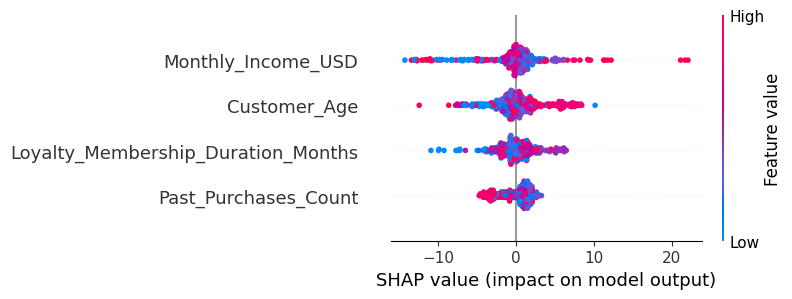

In [172]:
#Visualizing feature imp
explainer=shap.Explainer(best_xgb_model, X_train)
shap_values=explainer(X_train)

#Summary plot
shap.summary_plot(shap_values, X_train)

In [ ]:
# Compute correlation between features and target variable
correlation_matrix = df.corr()

# Select correlations only for the target variable
target_corr = correlation_matrix[["target_variable"]].sort_values(by="target_variable", ascending=False)


**<font size="6">Explaination of approaches & key takeways</font>**

**<font size="5">1. Firstly I have imported the required libraries, then I loaded dataset, checked few rows and shape.</font>**

**<font size="5">2.Next I have started EDA where I checked data info, null counts, duplicates and statistical summary.</font>**

**<font size="5">3. I have found the dataset doesn't include null values and duplicate values.</font>**

**<font size="5">4. I have plotted histogram and KDE to visualize skewness & kurtosis. The I have checked for skewness & kurtosis numerically.</font>**
                                                                                                         
**<font size="5">5. By interpretating skewness & kurtosis I found that the data is not highly skewed so I didn't perform log transformation.</font>**

**<font size="5">6. Next I checked for variance & Standard deviation</font>**

**<font size="5">7. And then I plotted boxplot to detect outliers. There were few outliers so I scaled using standard scaler</font>**

**<font size="5">8. Next I did feature selection where I filtered unwanted columns, low variance filter, high correlation filter using heat map and random forset filter.</font>**

**<font size="5">9. Though I removed some unwanted columns but other filters were 0.</font>**

**<font size="5">10. Now I splitted the dataset. The dataset was free from outliers, errors, anomalies and fit for analyzing.</font>**

**<font size="5">11. In model evaluation I applied regression model because the dataset is continous.</font>**

**<font size="5">12. Firstly I applied LinearRegresson and validated the training part using K-fold cross validation for generalizing the performance of the model, then I performed fit, generated prediction on test data and train data, plotted RMSE value & R2 score for both.</font>**
                                                                                                                    
**<font size="5">13. Then I started computing feature importances and plotted shap for feature visulaization</font>**

**<font size="5">14. My second model was RandomForest Regressor. In this model I did hyperparameter tuning using GridSearchCV. I used GridSearchCV because the data has less rows like around 500.</font>**

**<font size="5">15. In doing I got best parameters which I applied to validate training data using k-fold cross validation. Then I performed fit, generated prediction on test data & train data, calculated RMSE value & R2 score for both.</font>**

**<font size="5">16. Then I computed feature importances and visualized it using shap.</font>**

**<font size="5">17. The next model I used was ensemble ML model because it combines several model to give good accuracy.</font>**

**<font size="5">18. Here also I did hyperparameter tuning using GridSearcHCV, did cross validation, performed fit, generated prediction on test and train data, plotted RMSE value and R2 score.</font>**

**<font size="5">19 Then I computed feature importances and visualize it using shap.</font>**

**<font size="5">On performing everything the models are unable to perform well that means the dataset is not fair enough for analysis. It seems the data is complex and lacks strong relationship between datapoints.</font>**